<a href="https://colab.research.google.com/github/BATTI-CHANDAN-SINGH/Application-Of-Data-Mining/blob/main/Lab-07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.DataFrame(pd.read_csv('/content/SLR_Salary_dataset.csv'))
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [15]:
df.shape

(30, 3)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [19]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [24]:
df.isna().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


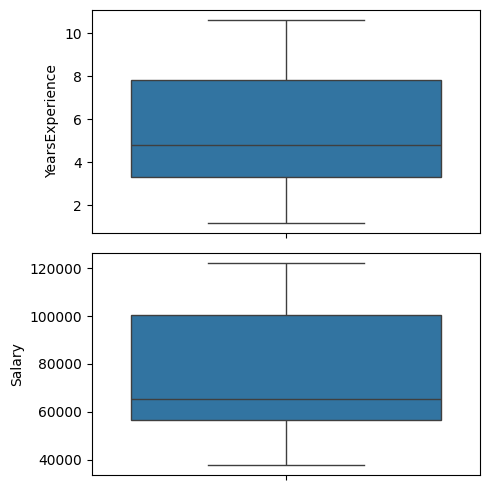

In [29]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['YearsExperience'], ax = axs[0])
plt2 = sns.boxplot(df['Salary'], ax = axs[1])
plt.tight_layout()

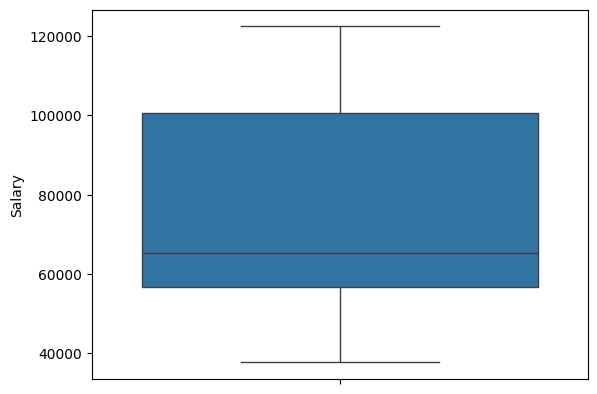

In [31]:
sns.boxplot(df['Salary'])
plt.show()

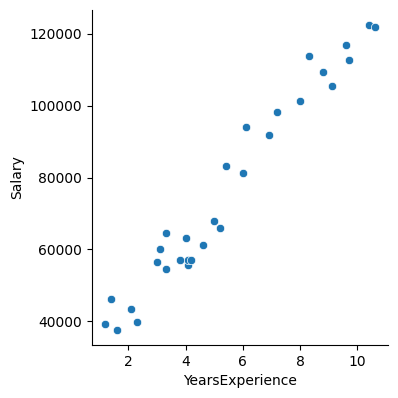

In [35]:
sns.pairplot(df, x_vars=['YearsExperience',], y_vars='Salary', height=4, aspect=1, kind='scatter')
plt.show()

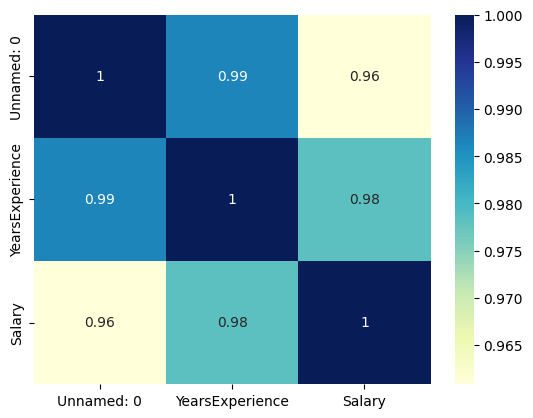

In [37]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [40]:
X = df['YearsExperience']
y = df['Salary']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [65]:
X_train.head()

,YearsExperience
0,1.2
4,2.3
16,5.2
5,3.0
13,4.2


In [56]:
y_train.head()

,Salary
0,39344.0
4,39892.0
16,66030.0
5,56643.0
13,57082.0


In [58]:
import statsmodels.api as sm

In [60]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [62]:
lr.params

,0
const,24985.530163
YearsExperience,9339.081724


In [66]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     427.6
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.74e-14
Time:                        04:41:16   Log-Likelihood:                -210.19
No. Observations:                  21   AIC:                             424.4
Df Residuals:                      19   BIC:                             426.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.499e+04   2546.938     

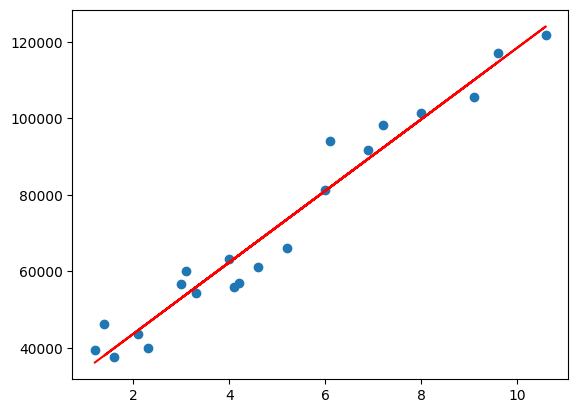

In [68]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 2.499e+04 + 9339.0817*X_train, 'r')
plt.show()

In [71]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

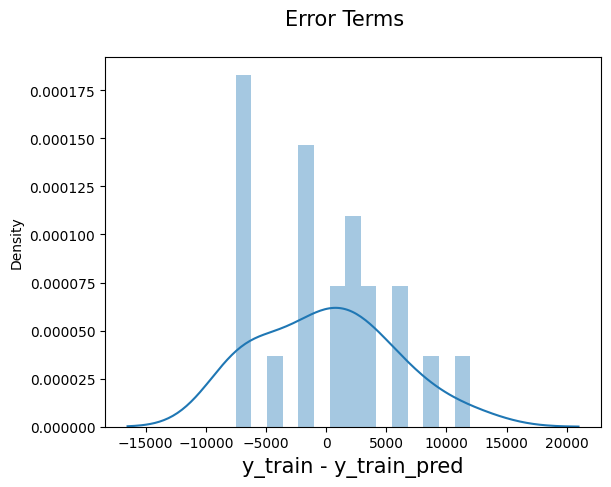

In [75]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

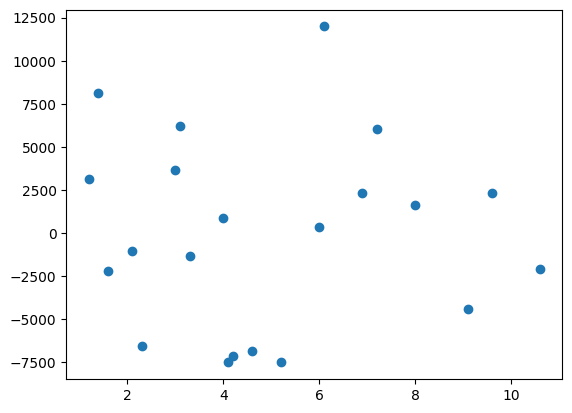

In [76]:
plt.scatter(X_train,res)
plt.show()

In [94]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)
y_pred.head()

,0
27,115574.622884
15,71680.938782
23,102499.908470
17,75416.571471
8,55804.499851


In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [96]:
np.sqrt(mean_squared_error(y_test, y_pred))

6146.923007994584

In [97]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9414466227178213

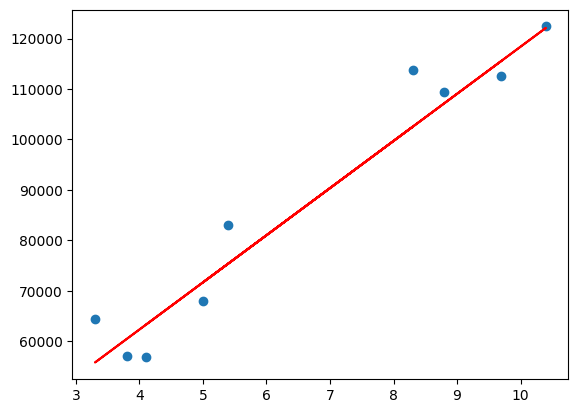

In [99]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 2.499e+04 + 9339.0817 * X_test, 'r')
plt.show()